# Assignment 2 Question 3
Grayson Hineline

Note for portfolio: This assignment was conducted when I was very new to Python and the Pandas library. Given my current skills I would have conducted the assignment much more efficiently.

## Question 3: Which daily metric has the strongest correlation with daily precipitation in Bellingham?

In [1]:
import pandas as pd
import numpy as np

What we're going to do here is take a whole bunch of the data from all the daily columns in the datasets, and plot them all on scatterplots to see which metric seems to have the strongest correlation with hourly precipitation.
*Edit: Originally I was going to compare 3 different cities, but I'm going on my 7th or 8th hour working on this lab now, so I'm going to just do Bellingham.*

The main problem is going to be all the columns that have objects as their values, and the columns that include categorical data rather than continuous. First we'll look at each daily column to narrow down which ones we can/should use (i.e. which columns can make sense when correlated with a continuous variable like daily precipiation.)

In [2]:
bham = pd.read_csv("WA_Bellingham.csv", low_memory = False)
bham

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72797624217,2020-01-01T00:14:00,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72797624217,2020-01-01T00:24:00,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72797624217,2020-01-01T00:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72797624217,2020-01-01T01:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72797624217,2020-01-01T02:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11343,72797624217,2020-12-31T20:53:00,FM-15,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11344,72797624217,2020-12-31T21:53:00,FM-15,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11345,72797624217,2020-12-31T22:53:00,FM-15,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11346,72797624217,2020-12-31T23:53:00,FM-15,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bham.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11348 entries, 0 to 11347
Data columns (total 124 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    STATION                                       int64  
 1    DATE                                          object 
 2    REPORT_TYPE                                   object 
 3    SOURCE                                        int64  
 4    AWND                                          float64
 5    BackupDirection                               float64
 6    BackupDistance                                float64
 7    BackupDistanceUnit                            float64
 8    BackupElements                                float64
 9    BackupElevation                               float64
 10   BackupElevationUnit                           float64
 11   BackupEquipment                               float64
 12   BackupLatitude                              

First we're going to filter our data to only include daily data. The documentation says the report types for the "Summary of day report from U.S. ASOS or AWOS station(s)" should be labeled SOD in the "REPORT TYPE" column. Lets check that there is daily data for all 366 days labeled as "SOD"

In [4]:
bham["REPORT_TYPE"].value_counts()

FM-15    8768
FM-16    2214
SOD       366
Name: REPORT_TYPE, dtype: int64

Yep, all good, lets pull out just those rows.

In [5]:
mask = bham["REPORT_TYPE"] == "SOD  " #I know the spaces are there from class
mask

0        False
1        False
2        False
3        False
4        False
         ...  
11343    False
11344    False
11345    False
11346    False
11347     True
Name: REPORT_TYPE, Length: 11348, dtype: bool

In [6]:
soddata = bham[mask]
soddata

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
27,72797624217,2020-01-01T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,804.0,1624.0,NaN,NaN
58,72797624217,2020-01-02T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1625.0,NaN,NaN
86,72797624217,2020-01-03T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1627.0,NaN,NaN
115,72797624217,2020-01-04T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1628.0,NaN,NaN
147,72797624217,2020-01-05T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1629.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11188,72797624217,2020-12-27T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1621.0,NaN,NaN
11236,72797624217,2020-12-28T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1621.0,NaN,NaN
11275,72797624217,2020-12-29T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1622.0,NaN,NaN
11304,72797624217,2020-12-30T23:59:00,SOD,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,803.0,1623.0,NaN,NaN


Now lets pull out just the columns with daily data

In [7]:
dayframe = soddata.iloc[:, 18:38] #we know the indexes from the .info() method earlier
dayframe

,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather
27,NaN,49,NaN,NaN,29.60,NaN,8.0,0,11.0,16,53.0,44,280,22,T,0.0,0.0,290.0,14.0,NaN
58,NaN,44,NaN,NaN,29.85,NaN,7.5,0,6.0,21,50.0,38,160,40,0.20,0.0,0.0,160.0,26.0,RA BR
86,NaN,55,NaN,NaN,29.59,NaN,21.4,0,16.9,10,61.0,48,160,54,0.10,0.0,0.0,170.0,36.0,RA
115,NaN,46,NaN,NaN,29.99,NaN,10.9,0,7.8,19,48.0,43,160,29,0.01,0.0,0.0,150.0,22.0,RA
147,NaN,45,NaN,NaN,30.01,NaN,13.0,0,6.7,20,49.0,41,160,50,0.16,0.0,0.0,160.0,35.0,RA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11188,NaN,44,NaN,NaN,29.91,NaN,6.5,0,6.4,21,48.0,39,180,20,0.13,NaN,NaN,160.0,15.0,RA
11236,NaN,40,NaN,NaN,29.96,NaN,3.2,0,2.3,25,48.0,31,030,11,0.00,NaN,NaN,30.0,9.0,FG BR
11275,NaN,37,NaN,NaN,30.06,NaN,2.9,0,-0.8,28,41.0,32,160,14,0.41,NaN,NaN,60.0,10.0,RA FG BR
11304,NaN,46,NaN,NaN,29.64,NaN,19.4,0,8.2,19,50.0,41,180,48,0.35,NaN,NaN,160.0,36.0,RA


Crap, it looks like a bunch of the rows are just NaNs.

In [8]:
dayframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 27 to 11347
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DailyAverageDewPointTemperature             0 non-null      float64
 1   DailyAverageDryBulbTemperature              366 non-null    object 
 2   DailyAverageRelativeHumidity                0 non-null      float64
 3   DailyAverageSeaLevelPressure                0 non-null      float64
 4   DailyAverageStationPressure                 351 non-null    float64
 5   DailyAverageWetBulbTemperature              0 non-null      float64
 6   DailyAverageWindSpeed                       366 non-null    float64
 7   DailyCoolingDegreeDays                      366 non-null    object 
 8   DailyDepartureFromNormalAverageTemperature  366 non-null    object 
 9   DailyHeatingDegreeDays                      366 non-null    object 
 10  DailyMaximu

So some columns just don't have data for Bellingham. "DailyAverageDewPointTemperature", "DailyAverageRelativeHumidity", "DailyAverageSeaLevelPressure" and "DailyAverageWetBulbTemperature" are just all NaNs, so lets drop those.

In [9]:
dayframe.drop(["DailyAverageDewPointTemperature", "DailyAverageRelativeHumidity", "DailyAverageSeaLevelPressure", 
               "DailyAverageWetBulbTemperature"], axis = "columns", inplace = True)

In [10]:
dayframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 27 to 11347
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DailyAverageDryBulbTemperature              366 non-null    object 
 1   DailyAverageStationPressure                 351 non-null    float64
 2   DailyAverageWindSpeed                       366 non-null    float64
 3   DailyCoolingDegreeDays                      366 non-null    object 
 4   DailyDepartureFromNormalAverageTemperature  366 non-null    object 
 5   DailyHeatingDegreeDays                      366 non-null    object 
 6   DailyMaximumDryBulbTemperature              366 non-null    float64
 7   DailyMinimumDryBulbTemperature              366 non-null    object 
 8   DailyPeakWindDirection                      366 non-null    object 
 9   DailyPeakWindSpeed                          366 non-null    object 
 10  DailyPrecip

Alright now we're going to go through the painful process of figuring out which columns we can use. To be used, a column's data must be continuous, or if categorical we must have someway to make it make sense when correlated with hourly precipitation.

In [11]:
dayframe["DailyAverageDryBulbTemperature"].value_counts()

44     22
41     18
62     17
55     16
60     15
45     15
53     13
63     13
61     13
64     13
56     12
52     11
58     11
57     11
42     10
59     10
47     10
40     10
46     10
49      9
39      9
38      9
48      9
43      8
66      7
67      7
65      7
51      6
68      5
37      5
69      4
50      4
36      3
72      3
32      3
54      3
30      2
35      2
33      2
18      1
70      1
44s     1
34      1
24      1
43s     1
47s     1
71      1
21      1
Name: DailyAverageDryBulbTemperature, dtype: int64

For some reason there are s's at the end of a bunch of these values.

In [12]:
dayframe["DailyAverageDryBulbTemperature"] = dayframe["DailyAverageDryBulbTemperature"].str.strip("s").astype(float)
dayframe["DailyAverageDryBulbTemperature"]

27       49.0
58       44.0
86       55.0
115      46.0
147      45.0
         ... 
11188    44.0
11236    40.0
11275    37.0
11304    46.0
11347    46.0
Name: DailyAverageDryBulbTemperature, Length: 366, dtype: float64

Moving on to DailyCoolingDegreeDays

In [13]:
dayframe["DailyCoolingDegreeDays"].value_counts()

0     335
1       7
2       7
3       5
4       4
7       3
0s      3
5       1
6       1
Name: DailyCoolingDegreeDays, dtype: int64

In [14]:
dayframe["DailyCoolingDegreeDays"] = dayframe["DailyCoolingDegreeDays"].str.strip("s").astype(float)
dayframe["DailyCoolingDegreeDays"]

27       0.0
58       0.0
86       0.0
115      0.0
147      0.0
        ... 
11188    0.0
11236    0.0
11275    0.0
11304    0.0
11347    0.0
Name: DailyCoolingDegreeDays, Length: 366, dtype: float64

I'm noticing a pattern here. Are all of the columns that aren't floats but should be just have random "s"'s at the end of them?

In [15]:
dayframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 27 to 11347
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DailyAverageDryBulbTemperature              366 non-null    float64
 1   DailyAverageStationPressure                 351 non-null    float64
 2   DailyAverageWindSpeed                       366 non-null    float64
 3   DailyCoolingDegreeDays                      366 non-null    float64
 4   DailyDepartureFromNormalAverageTemperature  366 non-null    object 
 5   DailyHeatingDegreeDays                      366 non-null    object 
 6   DailyMaximumDryBulbTemperature              366 non-null    float64
 7   DailyMinimumDryBulbTemperature              366 non-null    object 
 8   DailyPeakWindDirection                      366 non-null    object 
 9   DailyPeakWindSpeed                          366 non-null    object 
 10  DailyPrecip

In [16]:
dayframe["DailyDepartureFromNormalAverageTemperature"].value_counts()

3.6      8
1.3      6
0.8      6
1.7      6
4.9      5
        ..
-5.0     1
13.9     1
-12.0    1
8.0      1
13.3     1
Name: DailyDepartureFromNormalAverageTemperature, Length: 164, dtype: int64

In [17]:
dayframe["DailyHeatingDegreeDays"].value_counts()

0      35
21     22
24     18
3      17
10     16
5      15
20     15
4      13
2      13
12     13
1      13
9      12
7      11
13     11
8      11
19     10
23     10
18     10
6      10
25     10
16      9
26      9
17      9
27      9
22      8
14      6
28      5
15      4
11      3
33      3
29      3
35      2
32      2
30      2
47      1
21s     1
31      1
44      1
41      1
18s     1
22s     1
Name: DailyHeatingDegreeDays, dtype: int64

In [18]:
dayframe["DailyMinimumDryBulbTemperature"].value_counts()

51     18
47     17
49     16
48     16
52     16
54     15
41     14
50     14
36     13
39     12
33     12
57     12
56     12
31     11
45     11
32     11
43     10
53     10
35      9
34      9
44      9
42      8
55      8
37      8
38      8
40      7
28      7
59      6
60      5
29      5
46      5
58      5
30      5
62      3
27      3
26      3
15      3
25      2
23      2
18      1
35s     1
19      1
61      1
36s     1
40s     1
Name: DailyMinimumDryBulbTemperature, dtype: int64

In [19]:
dayframe["DailyPeakWindDirection"].value_counts()

190     51
180     49
170     45
160     38
200     20
150     18
040     16
030     14
300     14
290     10
020      8
210      8
310      8
010      7
280      7
140      6
270      5
330      4
050      3
260      3
360      3
190s     3
170s     2
060      2
220      2
160s     2
320      2
310s     2
240      2
340      2
350      1
140s     1
040s     1
090      1
100      1
020s     1
250      1
120      1
130      1
210s     1
Name: DailyPeakWindDirection, dtype: int64

In [20]:
dayframe["DailyPeakWindSpeed"].value_counts()

14     26
17     23
16     22
23     19
15     18
20     17
13     16
21     14
22     14
18     14
12     14
19     13
24     13
25     12
26     11
32      9
10      8
11      7
40      7
29      7
30      7
28      6
37      5
46      5
27      4
9       4
31      3
27s     3
38      3
36      3
35      3
45      2
43s     2
52      2
20s     2
42      2
57      2
39      2
44      2
43      2
8       2
34      2
50      1
35s     1
60      1
48      1
47      1
28s     1
34s     1
54      1
21s     1
7       1
44s     1
51      1
50s     1
41      1
Name: DailyPeakWindSpeed, dtype: int64

In [21]:
dayframe["DailyPrecipitation"].value_counts()

0.00    149
T        41
0.01     17
0.06     10
0.03      8
       ... 
0.82      1
0.64      1
0.24      1
0.55      1
0.38      1
Name: DailyPrecipitation, Length: 65, dtype: int64

In [22]:
dayframe["DailyWeather"].value_counts()

RA BR             84
RA                70
BR                26
FG BR             18
RA FG BR          11
FG BR HZ           8
HZ                 4
BR HZ              4
RA BR HZ           3
RA FG BR HZ        3
FZFG BR FG         3
SN BR              2
FG FZFG BR         2
TS RA BR           2
RA SN BR           2
TS RA              2
FG FZFG BR HZ      1
FZRA UP            1
RA FZRA            1
RA SN FG BR HZ     1
RA SN BR HZ        1
RA BR UP           1
SN BR UP           1
SN                 1
SN HZ              1
RA SN FG BR        1
RA SN              1
Name: DailyWeather, dtype: int64

Other than "DailyWeather" (which is categorical data I'm not going to include in the correlations stuff because it would really make sense) and "DailyPrecipitation", yes there are just annoying "s"'s in random places. Lets get rid of them.

In [23]:
drop_s_list = ["DailyDepartureFromNormalAverageTemperature","DailyHeatingDegreeDays",
               "DailyMinimumDryBulbTemperature","DailyPeakWindDirection","DailyPeakWindSpeed"]

for column in drop_s_list:
    dayframe[column] = dayframe[column].str.strip("s").astype(float)

In [24]:
dayframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 27 to 11347
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DailyAverageDryBulbTemperature              366 non-null    float64
 1   DailyAverageStationPressure                 351 non-null    float64
 2   DailyAverageWindSpeed                       366 non-null    float64
 3   DailyCoolingDegreeDays                      366 non-null    float64
 4   DailyDepartureFromNormalAverageTemperature  366 non-null    float64
 5   DailyHeatingDegreeDays                      366 non-null    float64
 6   DailyMaximumDryBulbTemperature              366 non-null    float64
 7   DailyMinimumDryBulbTemperature              366 non-null    float64
 8   DailyPeakWindDirection                      366 non-null    float64
 9   DailyPeakWindSpeed                          366 non-null    float64
 10  DailyPrecip

Great now we just have to fix daily precipitation and drop daily weather.

As I said, DailyWeather is categorical data that can't really be correlated like the rest of the data that are floats, so we're going to drop it.

In [25]:
dayframe.drop("DailyWeather", axis = "columns", inplace = True)

In [26]:
dayframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 27 to 11347
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DailyAverageDryBulbTemperature              366 non-null    float64
 1   DailyAverageStationPressure                 351 non-null    float64
 2   DailyAverageWindSpeed                       366 non-null    float64
 3   DailyCoolingDegreeDays                      366 non-null    float64
 4   DailyDepartureFromNormalAverageTemperature  366 non-null    float64
 5   DailyHeatingDegreeDays                      366 non-null    float64
 6   DailyMaximumDryBulbTemperature              366 non-null    float64
 7   DailyMinimumDryBulbTemperature              366 non-null    float64
 8   DailyPeakWindDirection                      366 non-null    float64
 9   DailyPeakWindSpeed                          366 non-null    float64
 10  DailyPrecip

Let's fix daily precipitation. The methodology is the same as removing the "s"'s, but this time we have to replace the "T"'s as well. Given that the "T"s mean a "trace" amount of precipitation had occured, let's just mark them as 0.001s. That way when we look at the final data we can see if the trace days have anything correlated with them.

In [27]:
dayframe["DailyPrecipitation"] = dayframe["DailyPrecipitation"].str.replace("T", "0.001")
dayframe["DailyPrecipitation"] = dayframe["DailyPrecipitation"].str.strip("s").astype(float)
dayframe["DailyPrecipitation"]

27       0.001
58       0.200
86       0.100
115      0.010
147      0.160
         ...  
11188    0.130
11236    0.000
11275    0.410
11304    0.350
11347    0.400
Name: DailyPrecipitation, Length: 366, dtype: float64

In [28]:
dayframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 27 to 11347
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DailyAverageDryBulbTemperature              366 non-null    float64
 1   DailyAverageStationPressure                 351 non-null    float64
 2   DailyAverageWindSpeed                       366 non-null    float64
 3   DailyCoolingDegreeDays                      366 non-null    float64
 4   DailyDepartureFromNormalAverageTemperature  366 non-null    float64
 5   DailyHeatingDegreeDays                      366 non-null    float64
 6   DailyMaximumDryBulbTemperature              366 non-null    float64
 7   DailyMinimumDryBulbTemperature              366 non-null    float64
 8   DailyPeakWindDirection                      366 non-null    float64
 9   DailyPeakWindSpeed                          366 non-null    float64
 10  DailyPrecip

Finally I want to look at the data for daily precipitation.

In [29]:
dayframe["DailyPrecipitation"].describe()

count    366.000000
mean       0.113123
std        0.222980
min        0.000000
25%        0.000000
50%        0.001000
75%        0.130000
max        1.820000
Name: DailyPrecipitation, dtype: float64

<AxesSubplot:ylabel='Frequency'>

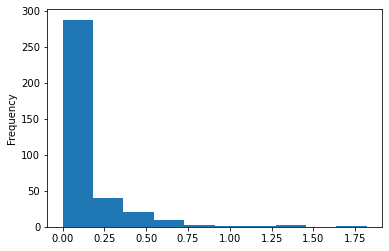

In [30]:
dayframe["DailyPrecipitation"].plot.hist()

Looks like the majority of the time it rains between 0 and 0.25 inches per day.

Alright, let's make some scatterplots!

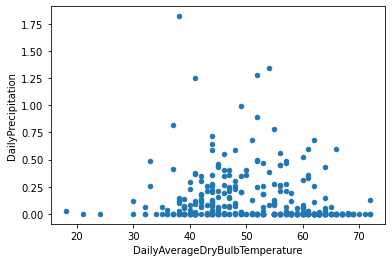

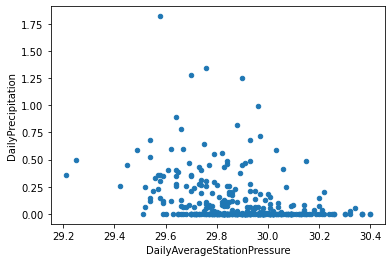

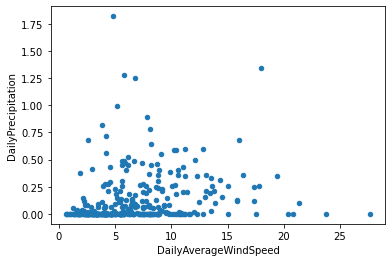

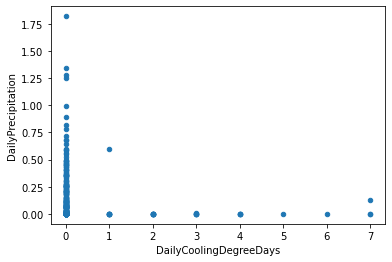

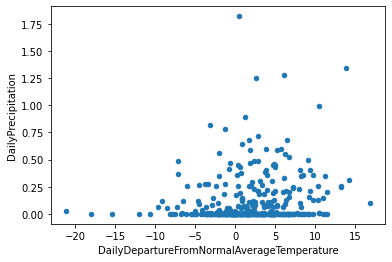

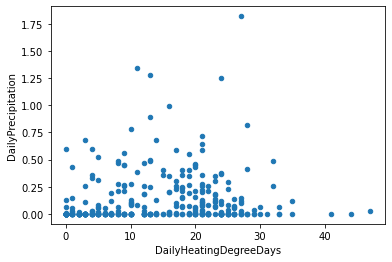

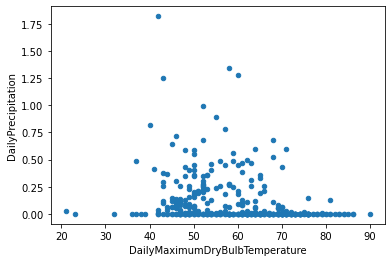

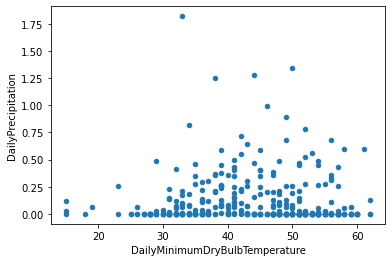

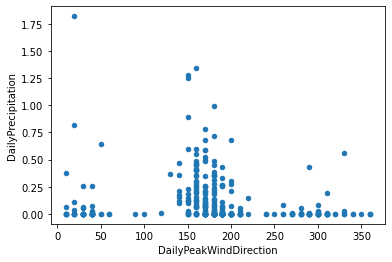

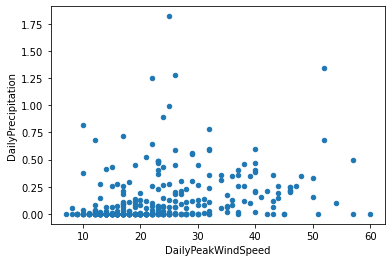

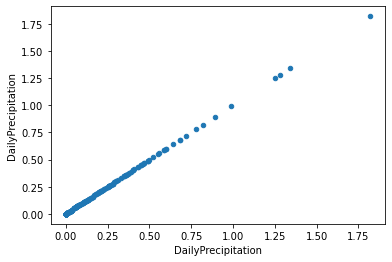

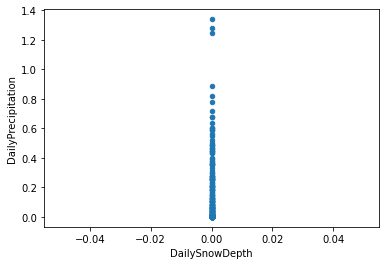

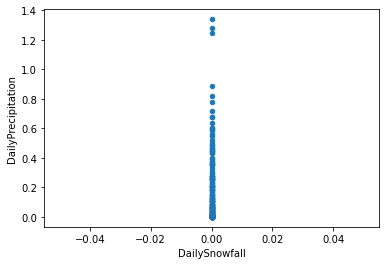

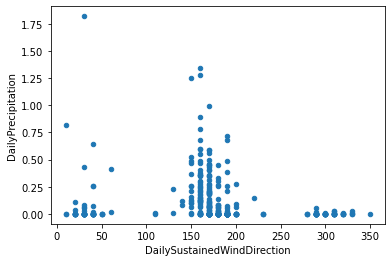

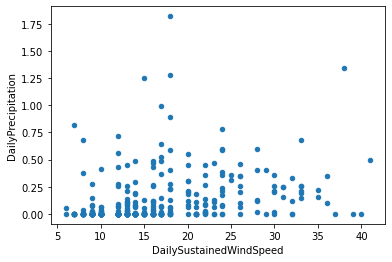

In [31]:
for column in dayframe.columns:
    dayframe.plot.scatter(x = column, y = "DailyPrecipitation")

Well that was underwelming. None of these variables seem to be that strong predictors of daily precipitation. However, there are a couple interesting things:
* The DailyAverageStationPressure had the most days with precipition when under 30 inches of mercury was recorded.
* Days with postive DailyDepartureFromNormalAverageTemperature tended to have higher amounts of precipitation.
* Precipitation seemed to occur more often in days when the wind direction was between 150 and 200 degrees, meaning that precipitation may be more likely when the wind is blowing south and slightly east.
* You would have thought that higher wind speeds would mean higher precipitation, but supprisingly it isn't.